# 4 Transport Solutions

In [2]:
%load_ext pymatbridge

C:\Anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


Starting MATLAB on ZMQ socket tcp://127.0.0.1:45183
Send 'exit' command to kill the server
......MATLAB started and connected!


## 4.1 1D Transient Solution for the Infinite Domain

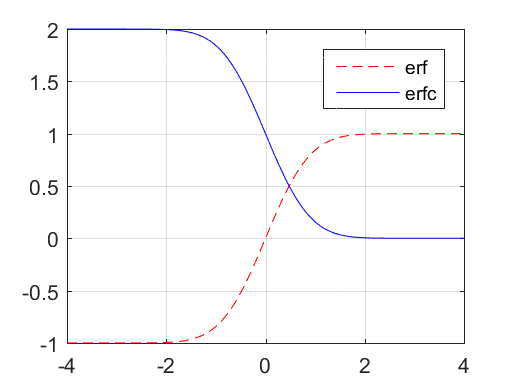

In [3]:
%%matlab
x = [-4:0.04:4];
plot(x,erf(x),'--r', x, erfc(x), 'b');
legend('erf', 'erfc',2);

grid

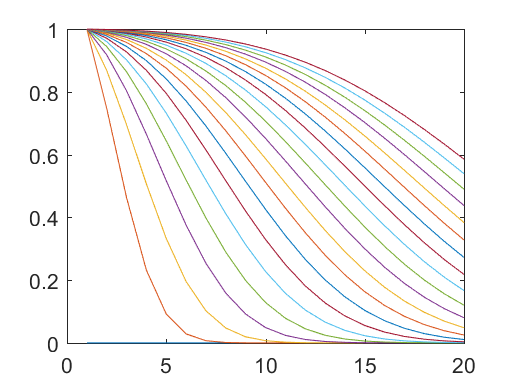

In [13]:
%%matlab
T = 1;                      % maximum time [s]
L = 1;                      % maximum length [m]
D = 0.1;                    % diffusivity / dispersivity [m*m/s]
v = 1;                      % velocity [m/s]
c0 = 0;                     % initial value [kg/m*m*m] (initial condition)
cin = 1;                    % inflow value [kg/m*m*m] (boundary condition)
M = 20;                     % number of timesteps
N = 20;                     % number of nodes  

e = ones(1,N);              % ones-vector
t = linspace(T/M,T,M);      % time discretization
x = linspace(0,L,N);        % space discretization

c = c0*e;                   % initial distribution

for i = 1:length(t)
    h = 1./(2.*sqrt(D*t(i)));       
    c = [c; 
         c0 + (cin - c0) * 0.5 * (erfc(h*(x-e*v*t(i))) + exp((v/D)*x).*erfc(h*(x+e*v*t(i))))];
end

plot(c')

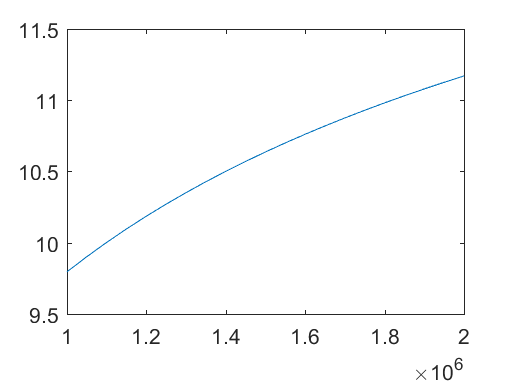

In [18]:
%%matlab
t = [10e5:5e4:20e5];
D = 1.0e-6;

plot(t, 5+10*erfc(ones(1,length(t))./(2*sqrt(D*t))));

In [ ]:
# %load code/analtrans.m
function analtrans
% 1D transport - modelling with extensions for decay and linear sorption
%    using analytical solution of Ogata & Banks (1961)                   
%
%   $Ekkehard Holzbecher  $Date: 2006/02/08 $
%--------------------------------------------------------------------------                       
T = 1;                      % maximum time [s]
L = 1;                      % maximum length [m]
D = 0.1;                    % diffusivity / dispersivity [m*m/s]
v = 1;                      % velocity [m/s]
lambda = 0.0;               % decay coefficient [1/s]
R = 3;                      % retardation [1]
c0 = 0;                     % initial value [kg/m*m*m] (initial condition)
cin = 1;                    % inflow value [kg/m*m*m] (boundary condition)

M = 20;                     % number of timesteps
N = 20;                     % number of nodes  
%-------------------------- output parameters
gplot = 0;                  % =1: breakthrough curves; =2: profiles   
gsurf = 0;                  % surface
gcont = 0;                  % =1: contours; =2: filled contours
ganim = 2;                  % animation of profiles; =1: single line; =2: all lines

%-------------------------- execution--------------------------------------

e = ones (1,N);             % ones-vector
t = linspace (T/M,T,M);     % time discretization
x = linspace (0,L,N);       % space discretization
c = c0*e;                   % initial distribution
u = sqrt(v*v+4*lambda*R*D);

for i = 1:size(t,2)
    h = 1./(2.*sqrt(D*R*t(i)));       
    c = [c; c0*exp(-lambda*t(i))*(e-0.5*erfc(h*(R*x-e*v*t(i)))-...
        0.5*exp((v/D)*x).*erfc(h*(R*x+e*v*t(i))))+...
        (cin-c0)*0.5*(exp((v-u)/(D+D)*x).*erfc(h*(R*x-e*u*t(i)))+...
        exp((v+u)/(D+D)*x).*erfc(h*(R*x+e*u*t(i))))]; 
end

%-------------------- graphical output-------------------------------------
switch gplot
    case 1 
        plot ([0 t],c)        % breakthrough curves
        xlabel ('time'); ylabel ('concentration');
    case 2 
        plot (x,c','--')      % profiles
        xlabel ('space'); ylabel ('concentration');
end
if gsurf                      % surface
    figure; surf (x,[0 t],c); 
    xlabel ('space'); ylabel ('time'); zlabel('concentration');
end  
if gcont figure; end
switch gcont
    case 1 
        contour (x,[0 t],c)   % contours
        grid on; xlabel ('space'); ylabel ('time');
    case 2 
        contourf(x,[0 t],c)   % filled contours
        colorbar; xlabel ('space'); ylabel ('time');
end    
if (ganim)
    [FileName,PathName] = uiputfile('*.mpg');
    figure; if (ganim > 1) hold on; end 
    for j = 1:size(c,1)
        axis manual;  plot (x,c(j,:),'r','LineWidth',2); 
        YLim = [min(c0,cin) max(c0,cin)];
        legend (['t=' num2str(T*(j-1)/M)]);
        Anim(j) = getframe;
        plot (x,c(j,:),'b','LineWidth',2); 
    end
    mpgwrite (Anim,colormap,[PathName '/' FileName]);  % mgwrite not standard MATLAB
    figure; movie (Anim,0);   % play animation
end 

## 4.2 A Simple Numerical Model

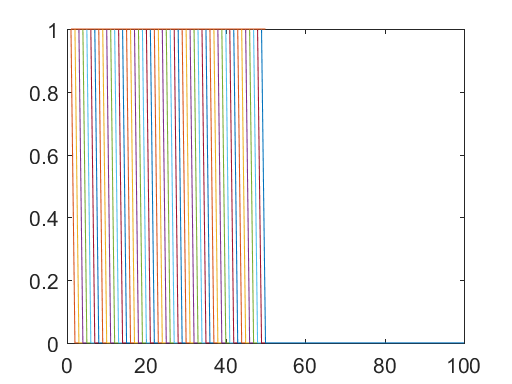

In [29]:
%%matlab
N = 100;
c0 = 0;
cin = 1;
c = c0*ones(1,N);
c = circshift(c', 1)';
c(1) = cin;
plot(c); hold on;
              

N = 50;
C0 = 0;
cin = 1;
c1 = c0*ones(1,N);
c = c1;
hold on;
              
for i = 1:N
    advection;
    plot(c1);
    c = [c;c1];
end              

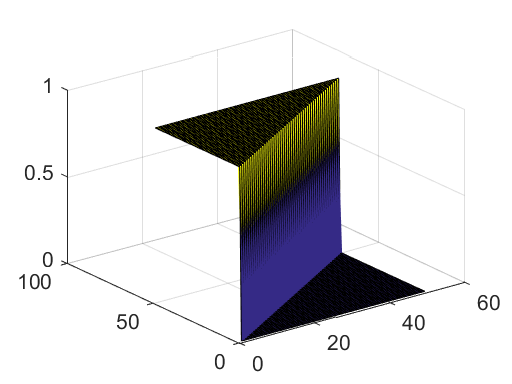

In [30]:
%%matlab
figure; surf(c);

In [ ]:
%%matlab
for i = 2:N-1
  c2(1) = c1(i) + Neumann*(c1(i-1) - 3*c1(i) + c1(i+1));
end

c2(1) * c1(1) + Neumann*(cin - 2*c1(1) + c1(i+1));
c2(1) * c1(1) + Neumann*(c1(N-1) - c1(N));
c1 = c2;

Neumann = 0.5;
c1 = 0c*ones(1, N);
c = c1;
hold on;

for i = 1:N
  diffusion;
  advection;
  plot(c1);
  c = [c;c1];
end
  

## 4.3 Comparison Between Analytical and Numerical Solution

## 4.4 Numerical Solution Using MATLAB pdep

## 4.5 Example: 1D Inflow Front

In [ ]:
# %load code/pdepetrans.m
function pdepetrans
% 1D transport - modelling with extensions for decay and fast sorption
%    using MATLAB pdepe                   
%
%   $Ekkehard Holzbecher  $Date: 2006/03/16 $
%--------------------------------------------------------------------------
T = 1;                     % maximum time [s]
L = 1;                     % length [m]
D = 1;                     % diffusivity [m*m/s]
v = 1;                     % velocity [m/s]
lambda = 0.0;              % decay constant [1/s]
sorption = 2;              % sorption-model: no sorption (0), linear (1), 
                           %                 Freundlich (2), Langmuir (3)
k1 = 0.0004;               % sorption parameter 1 (R=0 for linear isotherm with Kd, else k1=R) 
k2 = 0.5;                  % sorption parameter 2 (Kd for linear isotherm with Kd)
rhob = 1300;               % porous medium bulk density [kg/m*m*m]
theta = 0.2;               % porosity [-]
c0 = 0.0;                  % initial concentration [kg/m*m*m]
cin = 1;                   % boundary concentration [kg/m*m*m]

M = 40;                    % number of timesteps
N = 40;                    % number of nodes  
%-------------------------- output parameters
gplot = 0;                 % =1: breakthrough curves; =2: profiles   
gsurf = 0;                 % surface
gcont = 0;                 % =1: contours; =2: filled contours
ganim = 2;                 % animation of profiles; =1: single line; =2: all lines

t = linspace (T/M,T,M);    % time discretization
x = linspace (0,L,N);      % space discretization

%----------------------execution-------------------------------------------
if sorption == 1 && k1 <=0
    k1 = 1+k2*rhob/theta;
else
    if sorption > 1 k1 = rhob*k1/theta; end
end
options = odeset; if (c0 == 0) c0 = 1.e-20; end
c = pdepe(0,@transfun,@ictransfun,@bctransfun,x,[0 t],options,D,v,lambda,sorption,k1,k2,c0,cin);

%---------------------- graphical output ----------------------------------
switch gplot
    case 1 
        plot ([0 t],c)        % breakthrough curves
        xlabel ('time'); ylabel ('concentration');
    case 2 
        plot (x,c','--')      % profiles
        xlabel ('space'); ylabel ('concentration');
end
if gsurf                      % surface plot
    figure; surf (x,[0 t],c); 
    xlabel ('space'); ylabel ('time'); zlabel('concentration');
end  
if gcont figure; end
switch gcont
    case 1 
        contour (x,[0 t],c)   % contours
        grid on; xlabel ('space'); ylabel ('time');
    case 2 
        contourf(x,[0 t],c)   % filled contours
        colorbar; xlabel ('space'); ylabel ('time');
end    
if (ganim)
    [FileName,PathName] = uiputfile('*.mpg'); 
    figure; if (ganim > 1) hold on; end 
    for j = 1:size(c,1)
        axis manual;  plot (x,c(j,:),'r','LineWidth',2); 
        ylim ([min(c0,cin) max(c0,cin)]); 
        legend (['t=' num2str(T*(j-1)/M)]);
        Anim(j) = getframe;
        plot (x,c(j,:),'b','LineWidth',2); 
    end
    mpgwrite (Anim,colormap,[PathName '/' FileName]);     % mgwrite not standard MATLAB 
    movie (Anim,0);   % play animation
end 


%----------------------functions------------------------------
function [c,f,s] = transfun(x,t,u,DuDx,D,v,lambda,sorption,k1,k2,c0,cin)
switch sorption
    case 0 
        R = 1;
    case 1 
        R = k1; 
    case 2
        R = 1+k1*k2*u^(k2-1);
    case 3 
        R = 1+k1*k2*u/(k2+u)/(k2+u);
end
c = R;
f = D*DuDx;
s = -v*DuDx -lambda*R*u;
% --------------------------------------------------------------
function u0 = ictransfun(x,D,v,lambda,sorption,k1,k2,c0,cin)
u0 = c0;
% --------------------------------------------------------------
function [pl,ql,pr,qr] = bctransfun(xl,ul,xr,ur,t,D,v,lambda,sorption,k1,k2,c0,cin)
pl = ul-cin;
ql = 0;
pr = 0;
qr = 1;


## References